**The note for `Astrocut`**  
cite: [Astrocut Documentation](https://astrocut.readthedocs.io/en/latest/astrocut/index.html)  
@time: 2022.07.07  
@author: Ray Zhu  
! 此方法的FITS文件写入可能有问题


# FITS file image cutouts (`fits_cut`)  
输出文件为FITS格式

## 参数`single_outfile`  
astrocut可以同时对多个相同尺寸的图像进行cut，输出文件即可以放到一个FITS文件中，也可以单独保存，由`single_outfile`参数控制

In [9]:
from astrocut import fits_cut
from astropy.io import fits
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
PATH_data = '/Users/rui/Code/1_Astronotes/10_Astrocut/data'
PATH_out = "/Users/rui/Code/1_Astronotes/10_Astrocut/out"

试验数据：  
* https://archive.stsci.edu/pub/hlsp/candels/cosmos/cos-tot/v1.0/hlsp_candels_hst_acs_cos-tot-sect23_f606w_v1.0_drz.fits  
* https://archive.stsci.edu/pub/hlsp/candels/cosmos/cos-tot/v1.0/hlsp_candels_hst_acs_cos-tot-sect23_f814w_v1.0_drz.fits


In [ ]:
# ^ 设置参数
PATH_606 = os.path.join(PATH_data, 'hlsp_candels_hst_acs_cos-tot-sect23_f606w_v1.0_drz.fits')
PATH_814 = os.path.join(PATH_data, 'hlsp_candels_hst_acs_cos-tot-sect23_f814w_v1.0_drz.fits')
input_files = [PATH_606, PATH_814] # 输入文件路径，多个输入文件同时cut可写成列表

center_coord = SkyCoord("150.0945 2.38681", unit='deg')
cutout_size = [200, 300]

case_1: 单一输出

In [3]:
cutout_file = fits_cut(
    input_files=input_files, 
    coordinates=center_coord, 
    cutout_size=cutout_size, 
    output_dir=os.path.join(PATH_out, "case_1"), 
    single_outfile=True # 默认是True，只输出一个FITS，不同的输入文件的裁切放到hdul里
    )
print(cutout_file)

/Users/rui/Code/1_Learn/10_Learn Astrocut/out/case_1/cutout_150.094500_2.386810_200-x-300_astrocut.fits


In [4]:
hdul = fits.open(cutout_file)
hdul.info()

Filename: /Users/rui/Code/1_Learn/10_Learn Astrocut/out/case_1/cutout_150.094500_2.386810_200-x-300_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  CUTOUT        1 ImageHDU      2769   (200, 300)   float32   
  2  CUTOUT        1 ImageHDU      3345   (200, 300)   float32   


case_2: 单独输出

In [5]:
cutout_list = fits_cut(
    input_files=input_files, 
    coordinates=center_coord, 
    cutout_size=cutout_size, 
    output_dir=os.path.join(PATH_out, "case_2"), 
    single_outfile=False
    )
print(cutout_list)

['/Users/rui/Code/1_Learn/10_Learn Astrocut/out/case_2/hlsp_candels_hst_acs_cos-tot-sect23_f606w_v1.0_drz_150.094500_2.386810_200-x-300_astrocut.fits', '/Users/rui/Code/1_Learn/10_Learn Astrocut/out/case_2/hlsp_candels_hst_acs_cos-tot-sect23_f814w_v1.0_drz_150.094500_2.386810_200-x-300_astrocut.fits']


In [9]:
hdul = fits.open(cutout_list[0])
hdul.info()

Filename: /Users/rui/Code/1_Learn/10_Learn Astrocut/out/case_2/hlsp_candels_hst_acs_cos-tot-sect23_f606w_v1.0_drz_150.094500_2.386810_200-x-300_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  CUTOUT        1 ImageHDU      2769   (200, 300)   float32   


In [45]:
hdul = fits.open(cutout_list[1])
hdul.info()

Filename: /Users/rui/Code/1_Learn/10_Learn Astrocut/out/case_2/hlsp_candels_hst_acs_cos-tot-sect23_f814w_v1.0_drz_150.094500_2.386810_200-x-300_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  CUTOUT        1 ImageHDU      3345   (200, 300)   float32   


# image cutouts

In [46]:
png_files = img_cut(
    input_files=input_files, 
    coordinates=center_coord, 
    cutout_size=cutout_size, 
    output_dir=os.path.join(PATH_out, "case_3"), 
    img_format='png'
    )
print(png_files)

['/Users/rui/Code/1_Learn/10_Learn Astrocut/out/case_3/hlsp_candels_hst_acs_cos-tot-sect23_f606w_v1.0_drz_150.094500_2.386810_200-x-300_astrocut_0.png', '/Users/rui/Code/1_Learn/10_Learn Astrocut/out/case_3/hlsp_candels_hst_acs_cos-tot-sect23_f814w_v1.0_drz_150.094500_2.386810_200-x-300_astrocut_0.png']


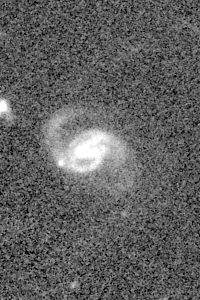

In [49]:
from PIL import Image

Image.open(png_files[0])

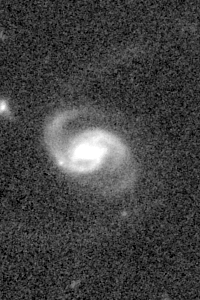

In [48]:
Image.open(png_files[1])